In [ ]:
#TO DO: Make sure all changes in github

source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [1]:
%pwd

'/Users/cristinasandoval/Desktop/DATA_practice/Capstone1'

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pwd

In [ ]:
!ls ..

In [3]:
path = 'Capstone1_Data'
filepath1 = os.path.join('..', path,'dataframe.csv') #if file is not in same dir as notebook, must change path
filepath2 = os.path.join('..', path,'dataframe_all_timestamps.csv') #if file is not in same dir as notebook, must change path

df = pd.read_csv(filepath1)
df_all_timestamps = pd.read_csv(filepath2)

In [5]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)


#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [5]:
#optional
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [6]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,9.877554,7.375882,3.178054,5.375278
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,9.940061,6.940222,6.326149,5.497168
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,12.242660,7.255591,5.003946,4.510860
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,9.674074,4.962845,2.397895,2.079442
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,11.518987,7.056175,3.891820,3.583519


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 20 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [29]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 20 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

In [9]:
video_likes = pd.DataFrame(df, columns=['video_id','likes', 'country'])
video_likes.head()

,video_id,likes,country
0,cJon8yBKv3g,1596,FR
1,g12KeCPRB4Q,1032,FR
2,irIZRH3JlIw,1415,FR
3,SnHtzkQZggA,142,FR
4,u6EoWM2KMPE,1159,FR


In [47]:
video_likes_base = pd.DataFrame(df, columns=['video_id','title','category','log_likes', 'log_views', 'country'])
video_likes = video_likes_base.sort_values(by=['log_likes'], ascending=False)
video_likes.head()

,video_id,title,category,log_likes,log_views,country
160289,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,15.540743,18.627784,GB
167397,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,15.510124,19.375121,GB
107307,xpVfcZ0ZcFM,Drake - God’s Plan,Music,15.371099,19.369109,GB
105767,kLpH1nSLJSs,Bad Bunny - Amorfoda | Video Oficial,Music,15.156776,19.611144,GB
155749,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,Music,15.037649,19.157256,GB


In [54]:
top_video_like = video_likes_base.head(100)
top_video_like


,video_id,title,category,log_likes,log_views,country
0,cJon8yBKv3g,Kingsman : Le Cercle d'or (Mickael J Critique),Film & Animation,7.375882,9.877554,FR
1,g12KeCPRB4Q,Vide grenier LIVE - 12 Novembre 2017,Gaming,6.940222,9.940061,FR
2,irIZRH3JlIw,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,News & Politics,7.255591,12.242660,FR
3,SnHtzkQZggA,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,Film & Animation,4.962845,9.674074,FR
4,u6EoWM2KMPE,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Comedy,7.056175,11.518987,FR
...,...,...,...,...,...,...
95,-bqyTKrGq18,DÉFIS TECHNIQUE INCROYABLE ! FOOTBALL SKILLS,Sports,8.089176,10.931624,FR
96,LucUgZucG9M,JE REFAIS DES PHOTOS ! #DÉFI,Entertainment,8.908965,11.492488,FR
97,1Cat-Fxks_s,La cuisson des œufs à la coque différente au M...,Comedy,3.332205,7.622175,FR
98,w9_TuLo3Ao0,ملخص مباراة المغرب وكوت ديفوار 2-0 شاشة كاملة ...,Sports,7.852439,13.511771,FR


In [49]:
num_top100_by_country = top_video_like['country'].value_counts()
num_top100_by_country

GB    76
US    15
IN     4
MX     2
CA     2
KR     1
Name: country, dtype: int64

Text(0, 0.5, 'Number of videos')

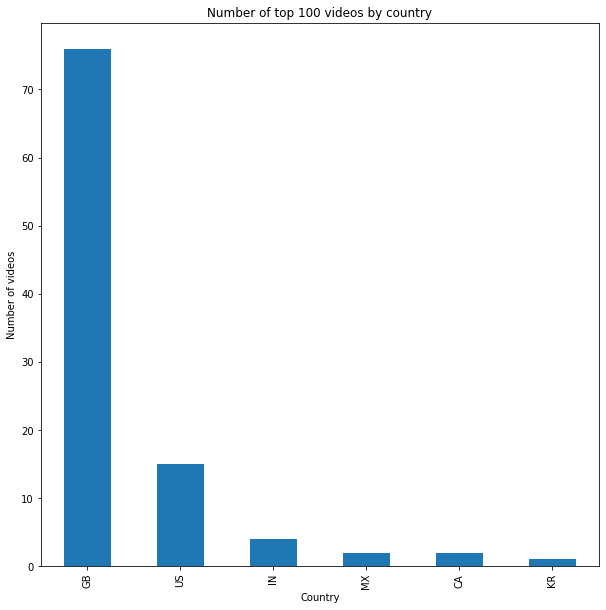

In [39]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
num_top100_by_country.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of top 100 videos by country') # Give the plot a main title
ax.set_xlabel('Country') # Set text for the x axis
ax.set_ylabel('Number of videos')# Set text for y axis

In [52]:
num_top100_by_category = top_video_like['category'].value_counts()
num_top100_by_category

Music                    75
Entertainment            14
Sports                    3
Comedy                    3
Film & Animation          2
Nonprofits & Activism     1
Gaming                    1
People & Blogs            1
Name: category, dtype: int64

Text(0, 0.5, 'Number of videos')

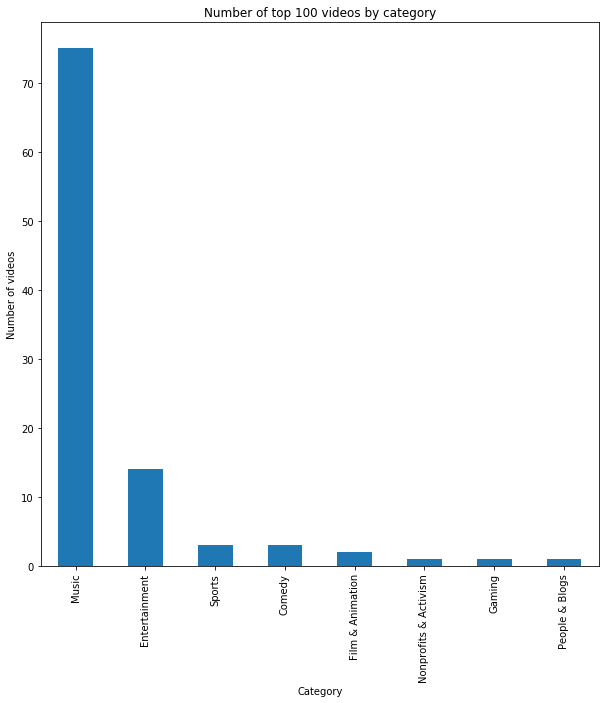

In [53]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
num_top100_by_category.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of top 100 videos by category') # Give the plot a main title
ax.set_xlabel('Category') # Set text for the x axis
ax.set_ylabel('Number of videos')# Set text for y axis

In [22]:
country_video = df.groupby(['country']).count()
country_video

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_timestamp
country,,,,,,,,,,,,,,,,,,,
CA,17338,17338,17338,17338,17338,17338,17338,17338,17338,17338,17338,17338,17338,17338,17338,17338,17338,17338,17338
DE,22965,22965,22965,22965,22965,22965,22965,22965,22965,22965,22965,22965,22965,22965,22965,22965,22965,22965,22965
FR,24085,24085,24085,24085,24085,24085,24085,24085,24085,24085,24085,24085,24085,24085,24085,24085,24085,24085,24085
GB,3070,3070,3070,3070,3070,3070,3070,3070,3070,3070,3070,3070,3070,3070,3070,3070,3070,3070,3070
IN,15222,15222,15222,15222,15222,15222,15222,15222,15222,15222,15222,15222,15222,15222,15222,15222,15222,15222,15222
JP,10808,10808,10808,10808,10808,10808,10808,10808,10808,10808,10808,10808,10808,10808,10808,10808,10808,10808,10808
KR,13793,13793,13793,13793,13793,13793,13793,13793,13793,13793,13793,13793,13793,13793,13793,13793,13793,13793,13793
MX,27900,27900,27900,27900,27900,27900,27900,27900,27900,27900,27900,27900,27900,27900,27900,27900,27900,27900,27900
RU,30783,30783,30783,30783,30783,30783,30783,30783,30783,30783,30783,30783,30783,30783,30783,30783,30783,30783,30783


In [13]:
category = df['category']
category.head()

0    Film & Animation
1              Gaming
2     News & Politics
3    Film & Animation
4              Comedy
Name: category, dtype: object

In [16]:
category.loc[1:100]

1                    Gaming
2           News & Politics
3          Film & Animation
4                    Comedy
5                    Sports
               ...         
96            Entertainment
97                   Comedy
98                   Sports
99                   Comedy
100    Science & Technology
Name: category, Length: 100, dtype: object

In [14]:
cat_counts = category.value_counts()
cat_counts

Entertainment            50468
People & Blogs           28045
News & Politics          20327
Sports                   12561
Comedy                   10358
Music                    10145
Howto & Style             9580
Film & Animation          8460
Gaming                    5318
Education                 3897
Science & Technology      3404
Autos & Vehicles          3274
Pets & Animals            2271
Nonprofits & Activism     1779
Travel & Events            812
Shows                      435
Movies                      12
Trailers                     3
Name: category, dtype: int64

Text(0, 0.5, 'Number of videos')

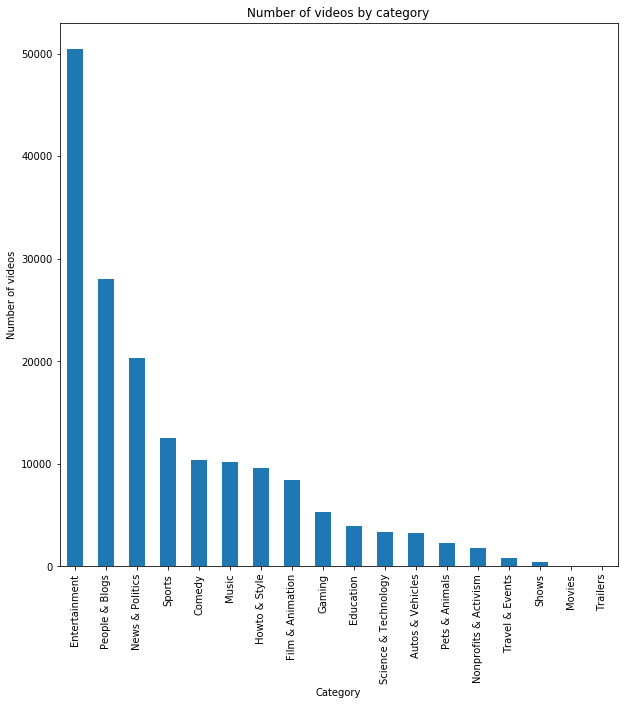

In [15]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
cat_counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of videos by category') # Give the plot a main title
ax.set_xlabel('Category') # Set text for the x axis
ax.set_ylabel('Number of videos')# Set text for y axis

In [ ]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
df.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of likes by category') # Give the plot a main title
ax.set_xlabel('Category') # Set text for the x axis
ax.set_ylabel('Number of likes')# Set text for y axis

In [8]:
country = df['country']
country.head()

0    FR
1    FR
2    FR
3    FR
4    FR
Name: country, dtype: object

In [7]:
country_count = df['country'].value_counts() 
country_count

RU    30783
MX    27900
FR    24085
DE    22965
CA    17338
IN    15222
KR    13793
JP    10808
US     5185
GB     3070
Name: country, dtype: int64

In [14]:
df['country'].value_counts() 

RU    30783
MX    27900
FR    24085
DE    22965
CA    17338
IN    15222
KR    13793
JP    10808
US     5185
GB     3070
Name: country, dtype: int64

Text(0, 0.5, 'Number of videos')

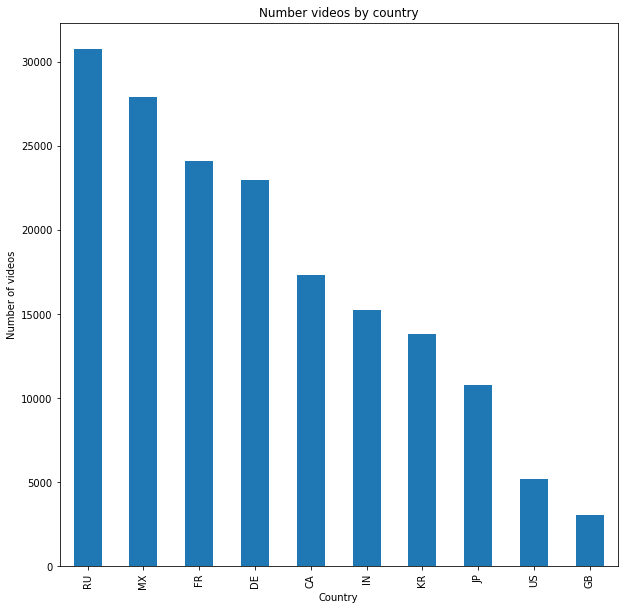

In [10]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
country_count.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number videos by country') # Give the plot a main title
ax.set_xlabel('Country') # Set text for the x axis
ax.set_ylabel('Number of videos')# Set text for y axis

Text(0, 0.5, 'Likes')

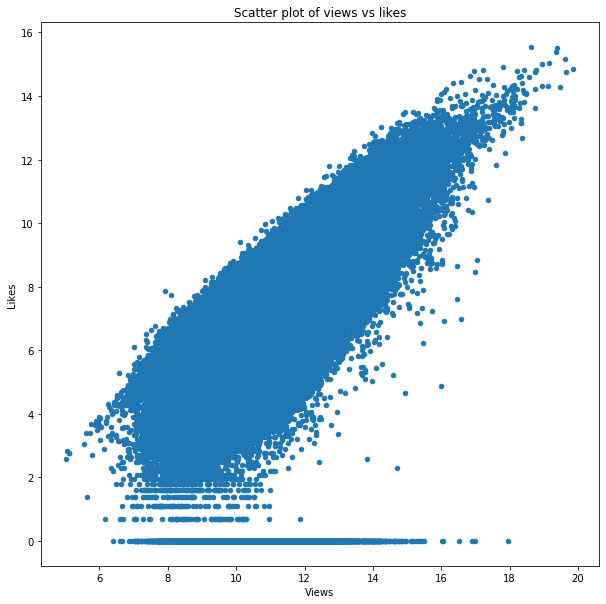

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
df.plot(kind = 'scatter', x = 'log_views', y = 'log_likes', ax = ax)
ax.set_title('Scatter plot of views vs likes') # Give the plot a main title
ax.set_xlabel('Views') # Set text for the x axis
ax.set_ylabel('Likes')# Set text for y axis

Text(0, 0.5, 'Likes')

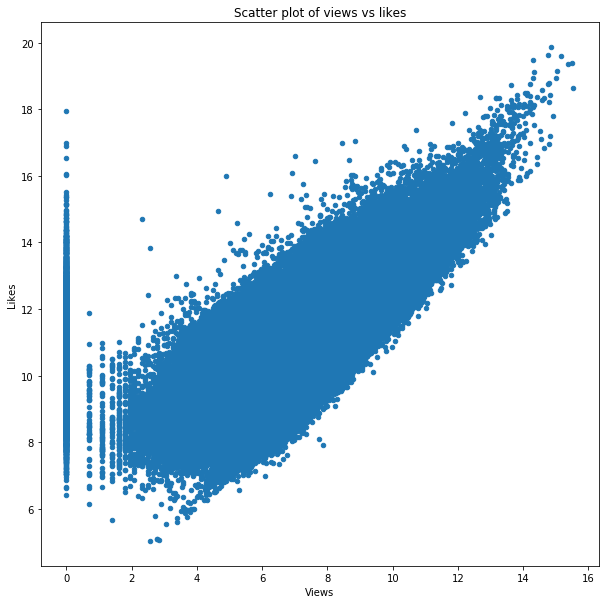

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
df.plot(kind = 'scatter', x = 'log_likes', y = 'log_views', ax = ax)
ax.set_title('Scatter plot of views vs likes') # Give the plot a main title
ax.set_xlabel('Views') # Set text for the x axis
ax.set_ylabel('Likes')# Set text for y axis

Text(0, 0.5, 'Dislikes')

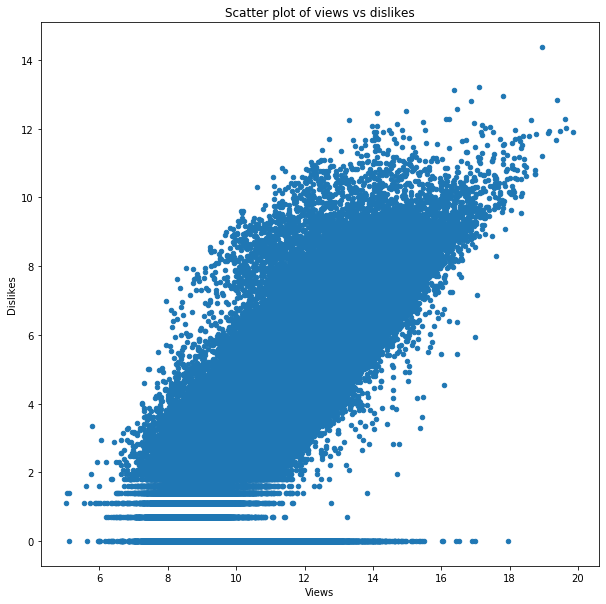

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
df.plot(kind = 'scatter', x = 'log_views', y = 'log_dislikes', ax = ax)
ax.set_title('Scatter plot of views vs dislikes') # Give the plot a main title
ax.set_xlabel('Views') # Set text for the x axis
ax.set_ylabel('Dislikes')# Set text for y axis

Text(0, 0.5, 'Dislikes')

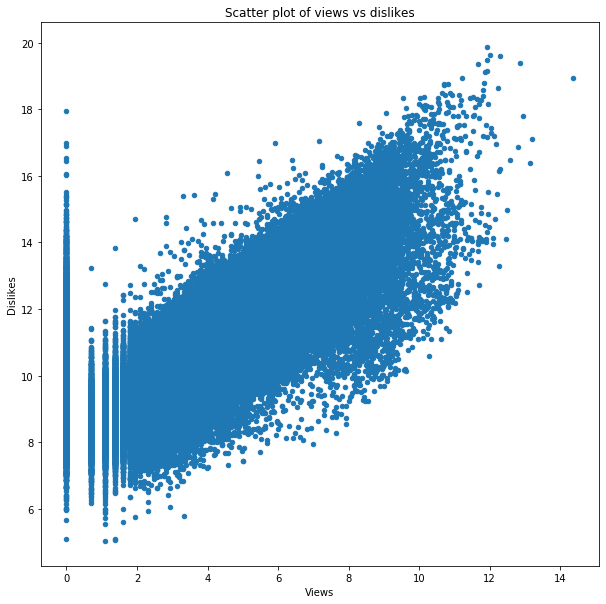

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
df.plot(kind = 'scatter', x = 'log_dislikes', y = 'log_views', ax = ax)
ax.set_title('Scatter plot of views vs dislikes') # Give the plot a main title
ax.set_xlabel('Dislikes') # Set text for the x axis
ax.set_ylabel('Views')# Set text for y axis

KeyError: 'log_likes'

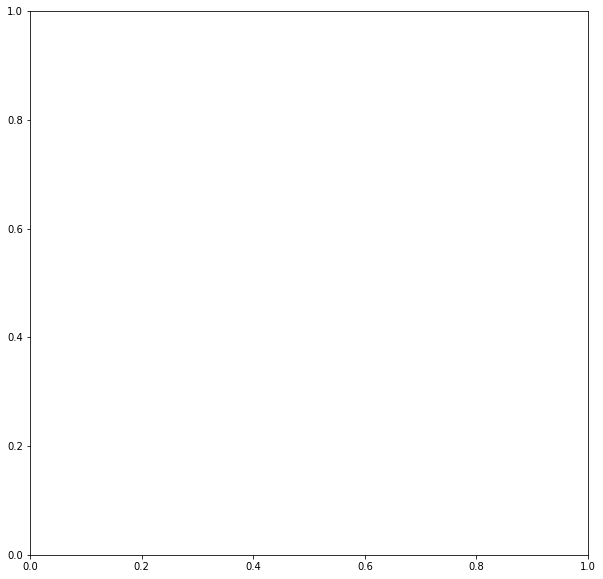

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
df.plot(kind = 'scatter', x = 'category_id', y = 'log_likes', ax = ax)
ax.set_title('Scatter plot of category_id vs likes') # Give the plot a main title
ax.set_xlabel('category_id') # Set text for the x axis
ax.set_ylabel('likes')# Set text for y axis

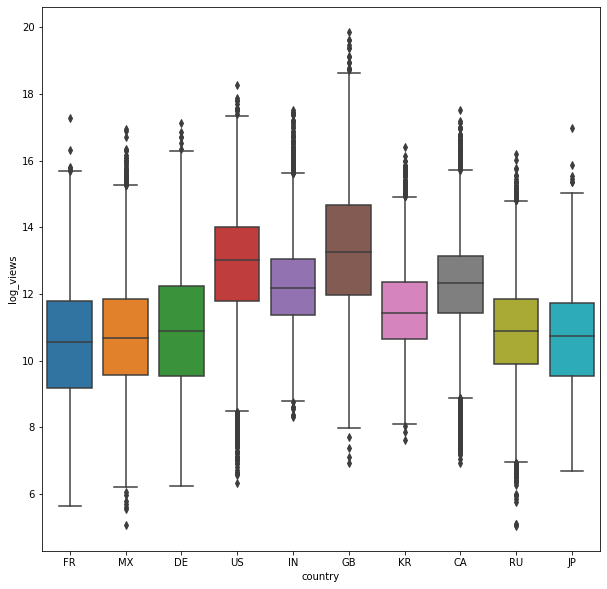

In [26]:
plt.figure(figsize = (10,10))
sns.boxplot(x = "country", y = 'log_views', data = df)

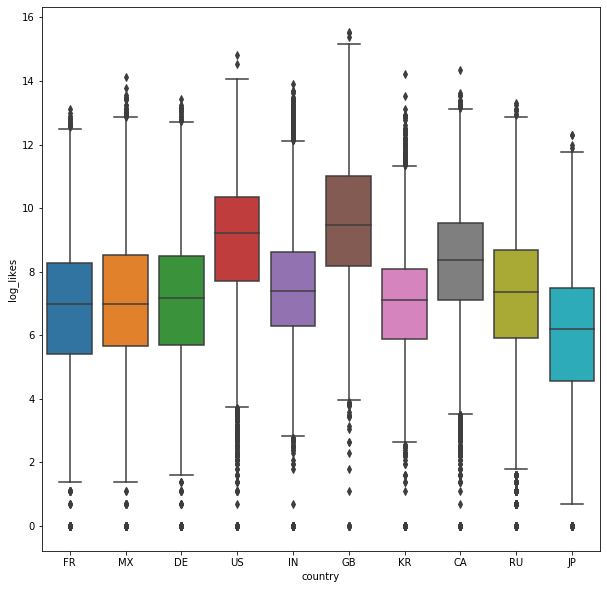

In [27]:
plt.figure(figsize = (10,10))
sns.boxplot(x = "country", y = 'log_likes', data = df)

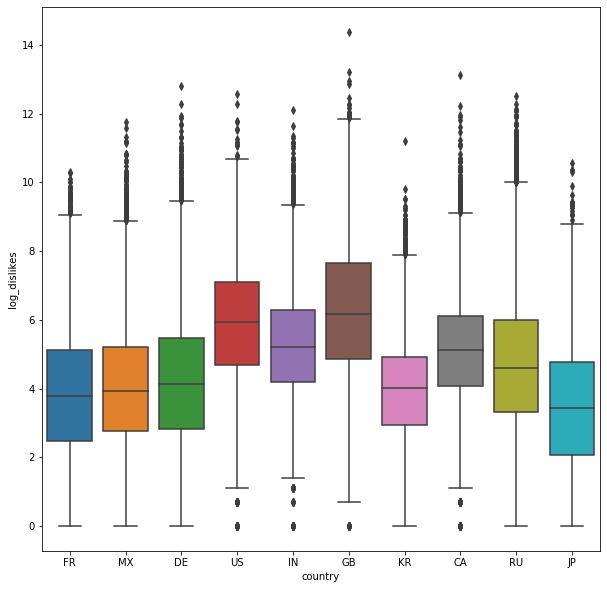

In [28]:
plt.figure(figsize = (10,10))
sns.boxplot(x = "country", y = 'log_dislikes', data = df)

In [ ]:
df_categories[df['category'].isin(['Entertainment','People & Blogs','News & Politics'])][['views','likes','dislikes']]


Entertainment            50468
People & Blogs           28045
News & Politics          20327
Sports                   12561
Comedy                   10358
Music                    10145
Howto & Style             9580
Film & Animation          8460
Gaming                    5318
Education                 3897
Science & Technology      3404
Autos & Vehicles          3274
Pets & Animals            2271
Nonprofits & Activism     1779
Travel & Events            812
Shows                      435
Movies                      12
Trailers                     3

In [34]:
entertainment = df[df['category'].isin(['Entertainment'])][['title','country','likes']]
entertainment

,title,country,likes
8,DALS S08 - Lenni-Kim danse un Tango avec Denit...,FR,618
10,MAGIE - IL FAIT APPARAÏTRE UN AVION DEVANT 230...,FR,34
14,Michel Sardou : Les révélations inédit de Loua...,FR,15
17,LES 5 MEILLEURS MAGICIENS DU MONDE PASSÉ SUR I...,FR,960
22,LES DILEMMES EN LIVE ! (REDIFFUSION),FR,1556
...,...,...,...
171134,Șoc! Fernando și Ciobi au fost eliminați de la...,DE,945
171139,لحظة تتويج ملف التلاتي بكأس العالم 2026 -خسارة...,DE,1915
171140,Simon Cowell Falls In LOVE With 'Ms. Trysh' Bu...,DE,8688
171142,வாணி ராணி - VAANI RANI - Episode 1593 - 13/6/...,DE,2197


In [42]:
Entertainment = df.loc[df['category'] == 'Entertainment']
Entertainment


,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp
8,_wChN4yabJM,2017-11-14,DALS S08 - Lenni-Kim danse un Tango avec Denit...,Danse avec les stars,24,Entertainment,2017-11-13,12:00:02,"Lenni-Kim""|""Denitsa Ikonomova""|""tango""|""Justin...",19004,618,4,44,https://i.ytimg.com/vi/_wChN4yabJM/default.jpg,False,False,False,"Pour la soirée du Switch, le public a décidé d...",FR,2017-11-13 12:00:02
10,hWtTJ3Q37rY,2017-11-14,MAGIE - IL FAIT APPARAÏTRE UN AVION DEVANT 230...,Cyril Ayrau,24,Entertainment,2017-11-13,05:54:40,"CYRIL AYRAU""|""Magicien Bergerac""|""Apparition a...",5114,34,1,11,https://i.ytimg.com/vi/hWtTJ3Q37rY/default.jpg,False,False,False,Cyril Ayrau Le Magicien de Bergerac fait appar...,FR,2017-11-13 05:54:40
14,O7JJllvepts,2017-11-14,Michel Sardou : Les révélations inédit de Loua...,koi de neuf? Buzz,24,Entertainment,2017-11-13,00:04:15,"Michel Sardou""|""Louane Emera""|""Je vole",7709,15,7,6,https://i.ytimg.com/vi/O7JJllvepts/default.jpg,False,False,False,Michel Sardou tacle Louane Emera : Elle dit de...,FR,2017-11-13 00:04:15
17,mAbw28ePp5c,2017-11-14,LES 5 MEILLEURS MAGICIENS DU MONDE PASSÉ SUR I...,HEROZ,24,Entertainment,2017-11-11,17:37:29,"HEROZ""|""LES 5 MEILLEURS MAGICIENS DU MONDE PAS...",50733,960,75,129,https://i.ytimg.com/vi/mAbw28ePp5c/default.jpg,False,False,False,top 10 magie magie facile magique filmé en dir...,FR,2017-11-11 17:37:29
22,ondy6jke_SQ,2017-11-14,LES DILEMMES EN LIVE ! (REDIFFUSION),Les dilemmes,24,Entertainment,2017-11-12,20:23:08,"tu""|""préfères""|""les""|""dilemme""|""plus""|""diffici...",43674,1556,79,322,https://i.ytimg.com/vi/ondy6jke_SQ/default.jpg,False,False,False,Saurez-vous faire face aux choix les plus diff...,FR,2017-11-12 20:23:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171134,Gn1s5k5DVlE,2018-06-14,Șoc! Fernando și Ciobi au fost eliminați de la...,Chefi la cuțite,24,Entertainment,2018-06-12,20:12:50,"fernando|""ciobi""|""eliminati""|""Chefi la cutite""...",120438,945,416,594,https://i.ytimg.com/vi/Gn1s5k5DVlE/default.jpg,False,False,False,Șoc! Fernando și Ciobi au fost eliminați de la...,DE,2018-06-12 20:12:50
171139,VdOGUFr3glA,2018-06-14,لحظة تتويج ملف التلاتي بكأس العالم 2026 -خسارة...,Sahifa-Tv قناة الصحيفة,24,Entertainment,2018-06-13,11:00:10,[none],429897,1915,1021,1635,https://i.ytimg.com/vi/VdOGUFr3glA/default.jpg,False,False,False,🛑Télécharge Onefootball maintenant : https://...,DE,2018-06-13 11:00:10
171140,mSJ_Qb9-WtA,2018-06-14,Simon Cowell Falls In LOVE With 'Ms. Trysh' Bu...,Talent Recap,24,Entertainment,2018-06-13,01:36:56,"America’s got talent|""Americas got talent""|""ag...",560827,8688,147,696,https://i.ytimg.com/vi/mSJ_Qb9-WtA/default.jpg,False,False,False,#Full Segment | America’s Got Talent Season 13...,DE,2018-06-13 01:36:56
171142,c5ZB0p0zBg0,2018-06-14,வாணி ராணி - VAANI RANI - Episode 1593 - 13/6/...,RadaanMedia,24,Entertainment,2018-06-13,16:30:00,"Vaani rani|""rani""|""Radhika in funny character""...",341799,2197,329,267,https://i.ytimg.com/vi/c5ZB0p0zBg0/default.jpg,False,False,False,Subscribers Link: http://bit.ly/2qb69dZConnect...,DE,2018-06-13 16:30:00


In [44]:
Entertainment_CountryCount = Entertainment['country'].value_counts() #count entertainment videos by country
Entertainment_CountryCount

MX    9575
DE    8684
IN    7070
CA    5913
FR    5788
RU    4363
KR    3680
JP    3289
US    1319
GB     787
Name: country, dtype: int64

In [51]:
ECC_df = Entertainment_CountryCount.to_frame(name='Counts').reset_index()
ECC_df.columns = ['country', 'count']
ECC_df

,country,count
0,MX,9575
1,DE,8684
2,IN,7070
3,CA,5913
4,FR,5788
5,RU,4363
6,KR,3680
7,JP,3289
8,US,1319
9,GB,787


In [ ]:
sns.barplot()

In [45]:
Entertainment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50468 entries, 8 to 171146
Data columns (total 20 columns):
video_id                  50468 non-null object
trending_date             50468 non-null object
title                     50468 non-null object
channel_title             50468 non-null object
category_id               50468 non-null int64
category                  50468 non-null object
publish_date              50468 non-null object
publish_time              50468 non-null object
tags                      50468 non-null object
views                     50468 non-null int64
likes                     50468 non-null int64
dislikes                  50468 non-null int64
comment_count             50468 non-null int64
thumbnail_link            50468 non-null object
comments_disabled         50468 non-null bool
ratings_disabled          50468 non-null bool
video_error_or_removed    50468 non-null bool
description               50468 non-null object
country                   50468 non-n

In [46]:
sns.boxplot(x = "country", y = 'log_views', data = entertainment)

ValueError: Could not interpret input 'log_views'